## **<center><font style="color:rgb(100,109,254)">Digital Image Processing Basics</font> </center>**
### **<center><font style="color:rgb(100,109,254)">Lab 01</font> </center>**


****

### **<font style="color:rgb(255,0,255)">01. Basics of OpenCV</font>**

**OpenCV: Open Source Computer Vision library to implement image processing**

In openCV we use arrays to store an image and Numpy library is used to handle arrays, image always store in 2D array

**Images types**
    
Gray scale Image: Single channel

True Color Image: RGB, BGR in Python, 3 channel

Binary Image: 1 bit, 0 or 1 black or white

**Functions for Images in Python**

In [1]:
import cv2    # OpenCV used as cv2 in python
import matplotlib.pyplot as plt # to plot inside 
print(cv2.__version__)

4.6.0


****

**Read an image and display**

In [2]:
path = "C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\33. Computer Vision Course\\pictures"


In [3]:
img = cv2.imread(path+"\\coloredChips.png")  # took path and name of image as an argument

In [4]:
print(img)

[[[157 182 197]
  [157 180 195]
  [155 178 192]
  ...
  [207 230 230]
  [204 228 229]
  [209 232 234]]

 [[150 171 192]
  [149 171 189]
  [149 173 187]
  ...
  [208 232 228]
  [204 229 229]
  [206 231 232]]

 [[146 165 185]
  [148 168 186]
  [149 172 187]
  ...
  [202 229 228]
  [201 226 227]
  [201 226 226]]

 ...

 [[143 163 174]
  [139 161 174]
  [135 159 171]
  ...
  [193 219 226]
  [197 224 231]
  [201 228 235]]

 [[141 161 169]
  [141 162 171]
  [137 159 169]
  ...
  [201 224 232]
  [200 222 230]
  [201 224 232]]

 [[144 162 169]
  [138 157 165]
  [142 160 170]
  ...
  [198 219 227]
  [196 217 225]
  [202 224 232]]]


In [5]:
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(-0.5, 517.5, 390.5, -0.5)

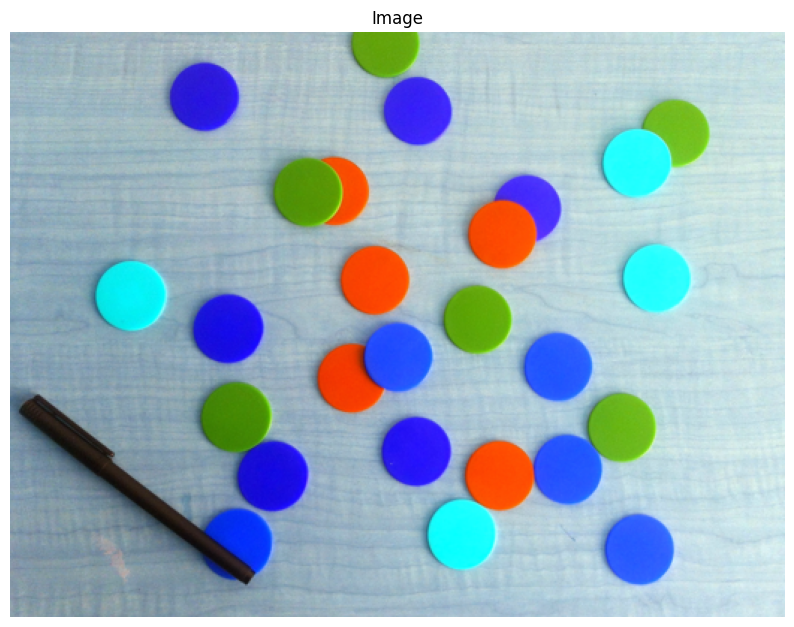

In [6]:
# Display image using matplotlib
plt.figure(figsize=[10,10])
plt.imshow(img)
plt.title("Image")
plt.axis("off")

****

**Resize image**

In [7]:
img_new = cv2.resize(img, (200, 200))

In [ ]:
plt.figure(1)
plt.imshow(img_new)
plt.title("Resized Image")
plt.axis("off")

In [8]:
cv2.imshow("Image", img)
cv2.imshow("NewImage", img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

****

**Read image in grayscale**

In [9]:
img1 = cv2.imread(path +"\\coloredChips.png", 0)  # 0 means in grayscale

In [10]:
cv2.imshow("Image1", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

*****

**Flip the image**

In [12]:
img = cv2.imread(path+"\\football.jpg")
cv2.imshow("fliped image", cv2.flip(img, -1))  # it take parameters 0,-1,1
cv2.waitKey(0)
cv2.destroyAllWindows()

****

**Convert image to grayscale and save in current directory**

In [13]:
import os 

img2 = cv2.imread(path+"\\football.jpg", 0)  # 0 means in grayscale
cv2.imshow("Image2", img2)

k = cv2.waitKey()  # waits untill key press or wait for particular miliseocds time
if k == ord('s'):
    os.chdir("C:/Users/hp/Google Drive/Fiverr Work/2022/33. Computer Vision Course/pictures")
    cv2.imwrite('output.png', img2)
    cv2.destroyAllWindows()
else:
    cv2.destroyAllWindows()

****

**Import video**

In [14]:

cap = cv2.VideoCapture(path+"\\traffic.avi")

print(cap)

< cv2.VideoCapture 00000294AD3310D0>


In [15]:
while True:
    success, frame = cap.read()
    
    cv2.imshow('video', frame)
    key = cv2.waitKey(100)
    
    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()

***

**How to use webcam**

In [16]:
import cv2

# 1. read video
cap = cv2.VideoCapture(0)

# now what is in cap, let's see
print('cap:', cap)  # so basically cap is an object of video capture

# as video is collection of frames
while True:

    status, frame = cap.read()    # status return boolean value True for read frame successfully, false for not

    # 2. resize the frame
    frame = cv2.resize(frame, (700, 500))

    # 3. convert frames into grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow("frames", frame)

    # showing gray frames
    cv2.imshow("gray frames", gray)

    # waits untill q pressed
    k = cv2.waitKey(100)
    if k == ord('q'):   # if not work the write k == ord('q') & 0xFF: this is mask
        break

cap.release() # relase the cap which capture the video
cv2.destroyAllWindows()




cap: < cv2.VideoCapture 00000294AD2EDF10>


****

**Separate B G R from webcam frame**

In [19]:
import cv2

# 1. read video
cap = cv2.VideoCapture(0)

# now what is in cap, let's see
print('cap:', cap)  # so basically cap is an object of video capture

# as video is collection of frames
while True:

    status, frame = cap.read()    # status return boolean value True for read frame successfully, false for not

    # make the copy of orignal frame
    blueFrame = frame.copy()
    greenFrame = frame.copy()
    redFrame = frame.copy()

    # 2. resize the frame
    frame = cv2.resize(frame, (700, 500))

    # 3. convert frames into grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # for blue make 1, and 2, green, and red 0
    blueFrame[:,:,1] = 0
    blueFrame[:,:,2] = 0

    # for green make 0, and 2, blue, and red 0
    greenFrame[:,:,0] = 0
    greenFrame[:,:,2] = 0

    # for blue make 0, and 1, blue, and green 0
    redFrame[:,:,0] = 0
    redFrame[:,:,1] = 0

    cv2.imshow("Blue frames", blueFrame)
    cv2.imshow("Green frames", greenFrame)
    cv2.imshow("Red frames", redFrame)

    cv2.imshow("frames", frame)

    # showing gray frames
    cv2.imshow("gray frames", gray)

    # waits untill q pressed
    k = cv2.waitKey(100)
    if k == ord('q'):   # if not work the write k == ord('q') & 0xFF: this is mask
        break

cap.release() # relase the cap which capture the video
cv2.destroyAllWindows()




cap: < cv2.VideoCapture 00000294AD28FDD0>


****

**How to draw shapes and lines on images**

In [18]:
import cv2
import numpy as np

# How to draw shapes and lines on images
# we have to crate a matrix filled with zeros

# img = np.zeros((512,512)) # this is gray scale image
# print(img.shape)

img = np.zeros((512,512,3),np.uint8) # defining three colors
print(img.shape)

# obtaining color
img[:] = 255,0,0 # print blue
cv2.imshow("blue",img)

img[:] = 0,255,0 # print green
cv2.imshow("green",img)

img[:] = 0,0,255 # print red
cv2.imshow("red",img)

img[200:300,10:500] = 0,255,0 # print green
cv2.imshow("center red",img)

img[10:500,200:300] = 0,255,0 # print green
cv2.imshow("center red",img)

img[250:260,10:500] = 255,255,255 # print green
cv2.imshow("center red",img)

img[10:500,250:260] = 255,255,255 # print green
cv2.imshow("center red",img)

cv2.line(img,(0,0),(512,512),(0,0,0),3)
cv2.line(img,(0,512),(512,0),(0,0,0),3)
cv2.imshow("new",img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(512, 512, 3)


****

**Get Pixel value Using Cursor**

In [ ]:
import cv2
import numpy as np

path = "C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\33. Computer Vision Course\\pictures"

def draw(event, x,y,flag,param): # x,y for event call
    if event == cv2.EVENT_LBUTTONDBLCLK:
        font = cv2.FONT_HERSHEY_PLAIN
        text = str(x) + "," + str(y)

        cv2.putText(image, text, (x,y), font, 2, (255,0,255), 2)

# load image
image = cv2.imread(path+"\\car.png")

# create window and set mouse callback
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw)
while True:
# show image
    cv2.imshow('image', image)
    key = cv2.waitKey(1)
    if key == ord("q"):
        break
cv2.destroyAllWindows()



*****

**Gaussian FIlter (Blur an Image)**

	A Gaussian Filter is a low pass filter used for reducing noise (high frequency components) and blurring regions of an image. The filter is implemented as an Odd sized Symmetric Kernel (DIP version of a Matrix) which is passed through each pixel of the Region of Interest to get the desired effect.
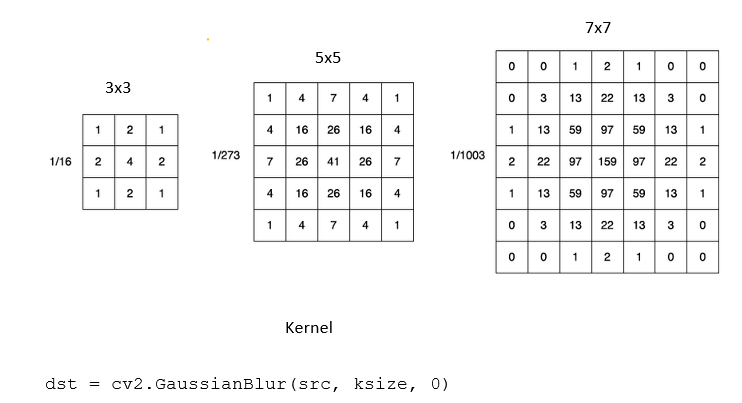

	Src: input image
	Ksize: Gaussian Kernel Size. [height width]. height and width should be odd and can have different values. If ksize is set to [0 0], then ksize is computed from sigma values.
	0: boarder type
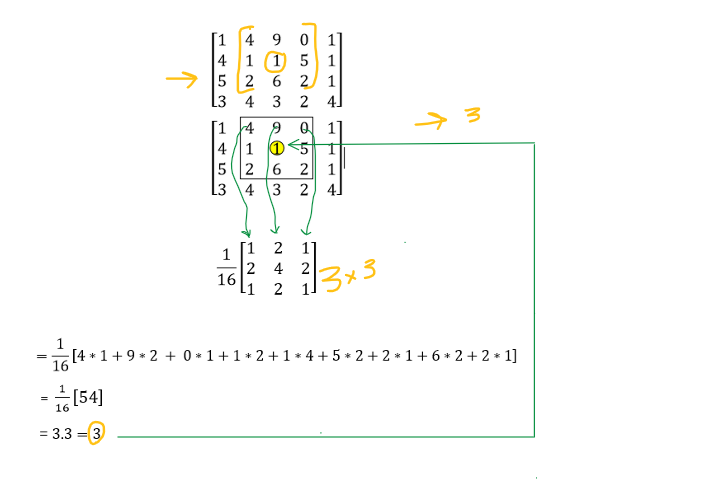

**Gaussian, Canny, Dilation, Erosion**

In [ ]:


import cv2
import numpy as np

img = cv2.imread('onion.PNG')
cv2.imshow("original Image", img)

kernel = np.ones((5,5),np.uint8)

# convert to gray
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

cv2.imshow('Gray Image',img_gray)


# convert to blur
img_blur = cv2.GaussianBlur(img_gray,(7,7),0)
cv2.imshow('Blur Image', img_blur)


# finding edges using canny functions
img_canny = cv2.Canny(img,200,200)
cv2.imshow('Canny Image', img_canny)

# Image dilation:  increase the thickness of edges
img_dilation = cv2.dilate(img_canny,kernel,iterations=1)
cv2.imshow('Dilation Image',img_dilation)


# Image Errosion
img_eroded = cv2.erode(img_dilation,kernel,iterations=1)
cv2.imshow('Eroded Image',img_eroded)
cv2.waitKey(0)
cv2.destroyAllWindows()


****

**Find Types of an Image Using PIL Library**


	PIL.Image.open(fp, mode='r', formats=None)
	
		Opens and identifies the given image file.
		This is a lazy operation; this function identifies the file, but the file remains open and the actual image data is not read from the file.

	PARAMETERS:
		
		fp – A filename (string), pathlib.Path object or a file object. The file object must implement file.read, file.seek, and file.tell methods, and be opened in binary mode.
			
		mode – The mode. If given, this argument must be “r”.


Link: https://pillow.readthedocs.io/en/stable/handbook/tutorial.

* **Modes**

The mode of an image is a string which defines the type and depth of a pixel in the image. Each pixel uses the full range of the bit depth. So a 1-bit pixel has a range of 0-1, an 8-bit pixel has a range of 0-255 and so on. The current release supports the following standard modes:

	• 1 (1-bit pixels, black and white, stored with one pixel per byte)
	• L (8-bit pixels, black and white)
	• P (8-bit pixels, mapped to any other mode using a color palette)
	• RGB (3x8-bit pixels, true color)
	• RGBA (4x8-bit pixels, true color with transparency mask)
	• CMYK (4x8-bit pixels, color separation)
	• YCbCr (3x8-bit pixels, color video format)
		○ Note that this refers to the JPEG, and not the ITU-R BT.2020, standard
	• LAB (3x8-bit pixels, the L*a*b color space)
	• HSV (3x8-bit pixels, Hue, Saturation, Value color space)
	• I (32-bit signed integer pixels)
	• F (32-bit floating point pixels)

In [ ]:
from PIL import Image
import cv2 as cv

def findTypeOfImage(image):

    if image.mode == "1":
        imageType = "1-bit pixels, black and white, stored with one pixel per byte"
    elif image.mode == "L":
        imageType = "8-bit pixels, black and white"
    elif image.mode == "P":
        imageType = "8-bit pixels, mapped to any other mode using a color palette"
    elif image.mode == "RGB":
        imageType = "3x8-bit pixels, true color"
    elif image.mode == "CMYK":
        imageType = "4x8-bit pixels, color separation"
    elif image.mode == "YCbCr":
        imageType = "3x8-bit pixels, color video format"
    elif image.mode == "LAB":
        imageType = "3x8-bit pixels, the L*a*b color space"
    elif image.mode == "HSV":
        imageType ="3x8-bit pixels, Hue, Saturation, Value color space"
    elif image.mode == "I":
        imageType = "32-bit signed integer pixels"
    elif image.mode == "F":
        imageType = "32-bit floating point pixels"

    return imageType


In [ ]:
path ="C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\15. Teaching OpenCV to Client\\Pics+scripts\\Pictures"

### Part 01 open the images icons01.png ....................#####

img1 = Image.open(path + "\\icons01.png")
img2 = Image.open(path + "\\icons02.png")

img1Type = findTypeOfImage(img1)
img2Type = findTypeOfImage(img2)

print(f"The Type of icons01.png is "+img1Type)
print(f"The Type of icons02.png is " +img2Type)


**Find RGB Values**

In [ ]:
def findRGBValuesByPIL(image, x, y):
    img = Image.open(image).convert("RGB")
    r, g, b = img.getpixel((x, y))

    value = (r, g, b)

    return value

In [ ]:
def findRGBValuesByOpenCV(image):
    blue = image[:,:,0]
    green = image[:,:,1]
    red = image[:,:,2]

    print(f"Blue color values: {blue} \nGreen Color Values: {green}\nRed Color Values: {red}")


In [ ]:
img3 = cv.imread(path + "\\rgb01.png")
img03 = path + "\\rgb01.png"

img4 = cv.imread(path + "\\rgb02.png")
img04 = path + "\\rgb02.png"

findRGBValuesByOpenCV(img3)
findRGBValuesByOpenCV(img4)

rgbValue = findRGBValuesByPIL(img03, 10, 10)
print(rgbValue)

cv.imshow("imgae3", img3)
cv.imshow("image4", img4)
cv.waitKey()
cv.destroyAllWindows()

*****

**Find Resolution, dimension, class(data type), Number of channel, Image Type**

In [ ]:
import tkinter as tk
from PIL import Image
import numpy as np
import cv2 as cv
import os

root = tk.Tk()

def findResolutionOfImage(image):

    # Image resolution is typically described in PPI, which refers to 
    # how many pixels are displayed per inch of an image

    # Screen Dimensions from Monitor (or Display) Control Panel	= 1024x768 pixels	
    # Viewable Width of Monitor	Screen Resolution = 12.5 inches	
    # Screen Resolution = 1024/12.5 = 82 ppi
    
    # find the width of your monitor or laptop 
    # it is in mm
    width_mm = root.winfo_screenmmwidth()
    # convert it to inches, To convert mm to inches, you must multiply the unit by 0.03937
    # because 1 mm = 0.03937 inches
    width_in = width_mm * 0.03937

    height = image.shape[0]
    width = image.shape[1]

    if height > width:
        resolution = round(height / width_in)
    else:
        resolution = round(width / width_in)
  
    return str(resolution) + " ppi"

In [ ]:
def completeInformation(image, img, name):

    resolution_img = findResolutionOfImage(image)
    dimension_img = image.shape

    height_img = dimension_img[0]
    width_img = dimension_img[1]

    channels_img = dimension_img[2]

    Type_img = findTypeOfImage(img)
    dataType_img = image.dtype


    print(f"\nThe resoltuion of {name} is " + resolution_img)
    print(f"The dimension {name} is {dimension_img}, height: {height_img}, width: {width_img}")
    print(f"Channels: {channels_img}\nData Type: {dataType_img}\nType: {Type_img}\n")



In [ ]:
path ="C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\15. Teaching OpenCV to Client\\Pics+scripts\\Pictures"

img_1 = cv.imread(path + "\\flower.png")
img1 = Image.open(path + "\\flower.png")
image_1_name = os.path.basename(path + "\\flower.png")

img_2 = cv.imread(path + "\\eagle.png")
img2 = Image.open(path + "\\eagle.png")
image_2_name = os.path.basename(path + "\\eagle.png")

completeInformation(img_1, img1, image_1_name)

completeInformation(img_2, img2, image_2_name)
